## FIGURE 3:

LOCAL CHANGES IN IMPERMEANT ANION AVERAGE CHARGE HAS AN EFFECT ON THE LOCAL MEMBRANE POTENTIALS AND CHLORIDE DRIVING FORCES

## IMPORTS

In [1]:
try:
        
    import h5py
    
    from ipywidgets import widgets, Layout, interact, interactive, interactive_output, Dropdown
    from IPython.display import display
    import matplotlib.pyplot as mplt
    import numpy as np
    import random
    import seaborn as sns 
    import pandas as pd
    import graphing as gr
    #!pip install viola
    ########## Modules required for artist drawing on matplotlib
    import matplotlib.path as mpath
    import matplotlib.lines as mlines
    import matplotlib.patches as mpatches
    from matplotlib.collections import PatchCollection
      
except ModuleNotFoundError:
        print("A class you are trying to import is not present in the directory")
    
except Exception:
        print("Something went wrong - modules have not been imported")

else: 
    print("All relevant classes imported")

All relevant classes imported


## FILE SELECTIONS

In [2]:
#######################################################
#### GUI 

edt_filename1 = widgets.Text(description = 'File name', value='Experiment-D9')
edt_filename2 = widgets.Text(description = 'File name', value='Experiment-D6')
edt_filename3 = widgets.Text(description = 'File name', value='Experiment-F4')
edt_filename4 = widgets.Text(description = 'File name', value='Experiment-D7')
edt_filename5 = widgets.Text(description = 'File name', value='Experiment-D8')

btn_select = widgets.Button(description = 'Select files',button_style='success', enabled=False)
btn_check_files = widgets.Button(description = 'Check files are present', button_style='info')
output_file = widgets.Output()
output_file.clear_output()

display(edt_filename1 ,edt_filename2, edt_filename3, edt_filename4, edt_filename5, btn_check_files, btn_select)

#######################################################
##### CHECK IF FILES ARE IN THE HOME DIRECTORY

def btn_check_files_clicked(b):
    
    file_name_arr= [edt_filename1.value, edt_filename2.value, edt_filename3.value, edt_filename4.value, edt_filename5.value]
    
    for i in range(len(file_name_arr)):
        file_name = "\\"
        file_name = file_name + file_name_arr[i]
        try: 
            with h5py.File(file_name, mode='r') as hdf:
                print(f" {file_name} found")
        except:
            print(f"{file_name} not found")
            
#######################################################
##### LOAD DATA FROM FILES INTO ARRAYS

def btn_select_clicked(b):
    
    global mega_arr, mega_ed_arr, file_name_arr
    
    file_name_arr= [edt_filename1.value, edt_filename2.value, edt_filename3.value, edt_filename4.value, edt_filename5.value]
    
    mega_arr = [] #contains all the compartment data for all the files
    mega_ed_arr = [] #contains all the electrodiffusion data for all the files
    file_name = "\\"
    
    for i in range(len(file_name_arr)):
        
        file_name = "\\"
        file_name = file_name + file_name_arr[i]
        
        with h5py.File(file_name, mode='r') as hdf:
                    
            global C, comp_names_arr, intervals, interval_arr, master_arr, t_arr, ED_master_arr,E_group_arr
            C = hdf.get('COMPARTMENTS')
            C_group_arr =[]
            t_arr_bool = True
            comp_names_arr= list(C.keys())

            C1 = C.get(comp_names_arr[0])

            T = hdf.get('TIMING')
            total_t = T.get('TOTAL_T')[()]
            intervals = T.get('INTERVALS')[()]
            dt = T.get("DT")[()]
            total_steps = total_t /dt          
            interval_step = total_steps / intervals
            interval_arr = [round(interval_step * i) for i in range(intervals)]

            master_arr = []
            t_arr =[]


            ##### LOADING COMPARTMENT DATA
            for e in range(len(comp_names_arr)):
                C_group = C.get(comp_names_arr[e])
                C_group_arr.append(C_group)

                data_arr_2 =[]
                for j in range(len(list(C_group.keys()))):
                    dataset = C_group.get(str(interval_arr[j]))
                    data_arr = []
                    for d in range(len(list(dataset))):
                        data_arr.append(dataset[d])

                    data_arr_2.append(data_arr)

                    if t_arr_bool == True:
                        t_arr.append(data_arr[0])         

                master_arr.append(data_arr_2)
                
            print(f" {file_name} compartment data loaded")
            t_arr_bool = False
            
            E = hdf.get('ELECTRODIFFUSION')
            E_group_arr = list(E.keys())
            ED_master_arr = []
            for x in range(len(E_group_arr)): # Looping through the electrodiffusion groups on the file
                E_group = E.get(E_group_arr[x])
                ED_data_arr =[] #stores the electrodiffusion data for a group

                for y in range(len(list(E_group.keys()))-1): # Looping through all the datasets of the group

                    dataset = E_group.get(str(interval_arr[y+1]))

                    ED_data_arr_2 = [] #stores the dataset values for one dataset
                    for z in range(len(list(dataset))): # Looping through the individual datasets to extract data
                        ED_data_arr_2.append(dataset[z])

                    ED_data_arr.append(ED_data_arr_2) 

                ED_master_arr.append(ED_data_arr) #contains all the electrodiffusion data for all the groups (1st index is the group, 2nd index is the interval)

            print(f" {file_name} electrodiffusion data loaded")
            
        mega_arr.append(master_arr)
        mega_ed_arr.append(ED_master_arr)
            
            
btn_select.on_click(btn_select_clicked)
btn_check_files.on_click(btn_check_files_clicked)     

Text(value='Experiment-D9', description='File name')

Text(value='Experiment-D6', description='File name')

Text(value='Experiment-F4', description='File name')

Text(value='Experiment-D7', description='File name')

Text(value='Experiment-D8', description='File name')

Button(button_style='info', description='Check files are present', style=ButtonStyle())

Button(button_style='success', description='Select files', style=ButtonStyle())

\Experiment-D9 not found
\Experiment-D6 not found
\Experiment-F4 not found
 \Experiment-D7 found
\Experiment-D8 not found
\Experiment-D9 not found
\Experiment-D6 not found
\Experiment-F4 not found
\ Experiment-D7 not found
\Experiment-D8 not found
 \ Experiment-D9 found
 \ Experiment-D6 found
\Experiment-F4 not found
\ Experiment-D7 not found
 \ Experiment-D8 found
 \ Experiment-D9 found
 \ Experiment-D6 found
 \ Experiment-F4 found
\ Experiment-D7 not found
 \ Experiment-D8 found
 \ Experiment-D9 found
 \ Experiment-D6 found
 \ Experiment-F4 found
 \Experiment-D7 found
 \ Experiment-D8 found
 \ Experiment-D9 compartment data loaded
 \ Experiment-D9 electrodiffusion data loaded
 \ Experiment-D6 compartment data loaded
 \ Experiment-D6 electrodiffusion data loaded
 \ Experiment-F4 compartment data loaded
 \ Experiment-F4 electrodiffusion data loaded
 \Experiment-D7 compartment data loaded
 \Experiment-D7 electrodiffusion data loaded
 \ Experiment-D8 compartment data loaded
 \ Experiment

### RESHAPING ARRAYS

In [3]:
z_arr =[-1.6,-1.2,-0.85,-0.5,-0.1]

   
temp_d9_a = [mega_arr[0][i][119:] for i in range(len(mega_arr[0]))]

temp_d9_b = [temp_d9_a[i][0:190] + temp_d9_a[i][190:390:2] + temp_d9_a[i][390:] for i in range(len(temp_d9_a))]



temp_d8_a = [mega_arr[4][i][15:] for i in range(len(temp_d9_a))]

temp_d8_b = [temp_d8_a[i][0:179] + temp_d8_a[i][180:188] + temp_d8_a[i][189:197] + temp_d8_a[i][198:206] + 
             temp_d8_a[i][207:214] + temp_d8_a[i][215:223] + temp_d8_a[i][224:231] + temp_d8_a[i][232:239] + 
             temp_d8_a[i][240:] for i in range(len(temp_d8_a))]



mega_arr[0] = temp_d9_b
mega_arr[4] = temp_d8_b


for i in range(len(mega_arr)):
    for j in range(len(interval_arr)):
        if mega_arr[i][8][j][8] != -0.85:
            print(f"{file_name_arr[i]} - z change at interval {j}")
            break 
            
for i in range(len(mega_arr)):
    for j in range(700):
        if round(mega_arr[i][8][j][8],3) == z_arr[i]:
            print(f"{file_name_arr[i]} - z reaches target at interval {j}")
            break 

"""
temp_arr_d9 = []
temp_arr_d8 = [] 
for c in range(len(mega_arr[0])):
    tt_d9 = []
    for i in range(len(mega_arr[0][c])):
        if i <= 300:
            tt_d9.append(mega_arr[0][c][i])
        elif i >300 and i<=400:
            if np.mod(i,2)==0: 
                tt_d9.append(mega_arr[0][c][i])
        elif i>400:
            tt_d9.append(mega_arr[0][c][i])
    temp_arr_d9.append(tt_d9)
            
    for k in range(len(mega_arr[4][8])):
        if k not in [188,196,204,212,220,228,236,244]:
            temp_arr_d8.append(mega_arr[4][c][k])



for i in range(500):
    if round(temp_arr_d9[8][i][8],4) == -1.6:
        print(i)
        break
    
#mega_arr[0] = temp_arr_d9
#mega_arr[4] = temp_arr_d8
"""


 Experiment-D9 - z change at interval 167
 Experiment-D6 - z change at interval 167
Experiment-D7 - z change at interval 167
 Experiment-D8 - z change at interval 167
 Experiment-D9 - z reaches target at interval 250
 Experiment-D6 - z reaches target at interval 250
 Experiment-F4 - z reaches target at interval 0
Experiment-D7 - z reaches target at interval 250
 Experiment-D8 - z reaches target at interval 250


'\ntemp_arr_d9 = []\ntemp_arr_d8 = [] \nfor c in range(len(mega_arr[0])):\n    tt_d9 = []\n    for i in range(len(mega_arr[0][c])):\n        if i <= 300:\n            tt_d9.append(mega_arr[0][c][i])\n        elif i >300 and i<=400:\n            if np.mod(i,2)==0: \n                tt_d9.append(mega_arr[0][c][i])\n        elif i>400:\n            tt_d9.append(mega_arr[0][c][i])\n    temp_arr_d9.append(tt_d9)\n            \n    for k in range(len(mega_arr[4][8])):\n        if k not in [188,196,204,212,220,228,236,244]:\n            temp_arr_d8.append(mega_arr[4][c][k])\n\n\n\nfor i in range(500):\n    if round(temp_arr_d9[8][i][8],4) == -1.6:\n        print(i)\n        break\n    \n#mega_arr[0] = temp_arr_d9\n#mega_arr[4] = temp_arr_d8\n'

## FIG 2A

Alteration of charge, concentration and volume in compartment 8, compartment 4 and soma


Button(button_style='success', description='Plot 2A', style=ButtonStyle())

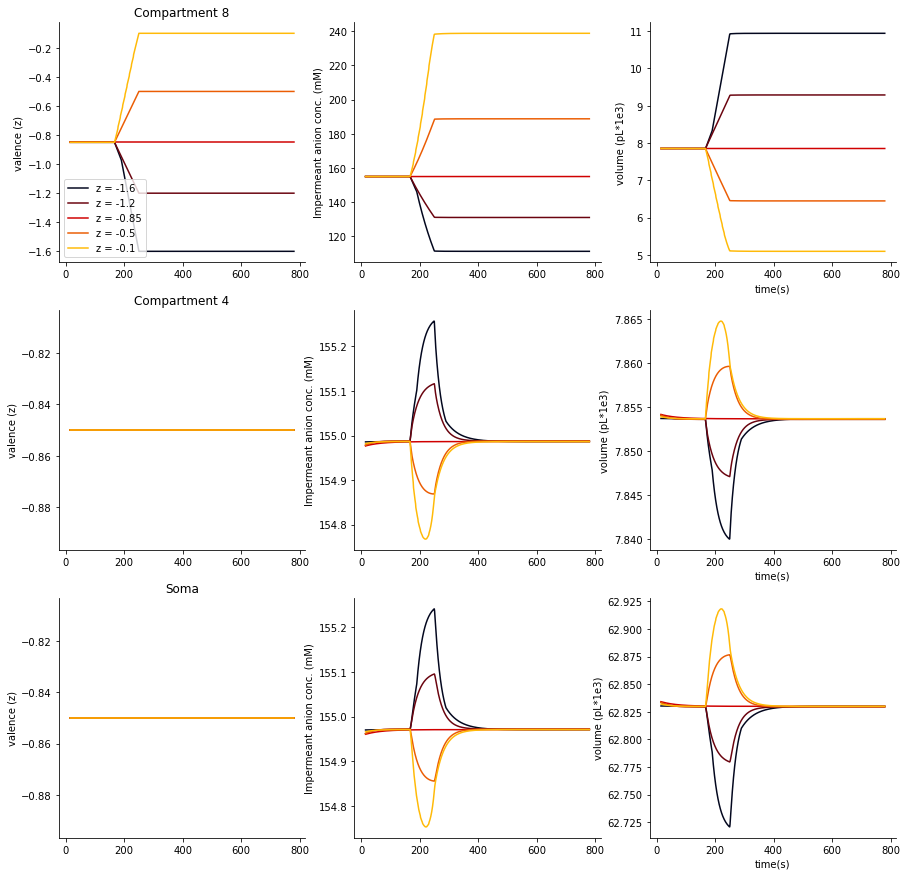

In [6]:
######
btn_plot_2a = widgets.Button(description="Plot 2A", button_style='success')
display(btn_plot_2a)
#####

z_arr = ["z = -1.6","z = -1.2", "z = -0.85", "z = -0.5","z = -0.1",]
colour_arr = ["#03071E","#6A040F", "#D00000", "#EB5D04","#FFBA08"] 


def btn_plot_2a_clicked(b):
    
    f2a, [(ax8_z,ax8_x,ax8_vol),(ax4_z, ax4_x,ax4_vol),(ax0_z,ax0_x,ax0_vol)] = mplt.subplots(3,3,figsize=(15,15), sharex=False, sharey=False) 
    x_arr = [ i for i in range(781)]
    
    for i in range(len(mega_arr)):
        
        y_8z_arr, y_8x_arr,y_8vol_arr = [],[],[]
        y_4z_arr, y_4x_arr,y_4vol_arr = [],[],[]
        y_0z_arr, y_0x_arr,y_0vol_arr = [],[],[]
        for j in range(781):
            try:
                y_8z_arr.append(mega_arr[i][8][j][8])
                y_8x_arr.append(mega_arr[i][8][j][7]*1e3)
                y_8vol_arr.append(mega_arr[i][8][j][3]*1e15)
                
                y_4z_arr.append(mega_arr[i][4][j][8])
                y_4x_arr.append(mega_arr[i][4][j][7]*1e3)
                y_4vol_arr.append(mega_arr[i][4][j][3]*1e15)
                
                y_0z_arr.append(mega_arr[i][0][j][8])
                y_0x_arr.append(mega_arr[i][0][j][7]*1e3)
                y_0vol_arr.append(mega_arr[i][0][j][3]*1e15)
            except:
                print(i)
                
        ax8_z.set_title("Compartment 8")
        ax8_z.plot(x_arr[15:],y_8z_arr[15:], label = z_arr[i], color= colour_arr[i])
        ax8_z.legend()
        ax8_z.set_ylabel("valence (z)")
        ax8_x.plot(x_arr[15:],y_8x_arr[15:], label = z_arr[i], color= colour_arr[i])
        ax8_x.set_ylabel("Impermeant anion conc. (mM)")
        ax8_vol.plot(x_arr[15:],y_8vol_arr[15:], label = z_arr[i], color= colour_arr[i])
        ax8_vol.set_ylabel("volume (pL*1e3)")
        ax8_vol.set_xlabel("time(s)")
        
        ax4_z.set_title("Compartment 4")
        ax4_z.plot(x_arr[15:],y_4z_arr[15:], label = z_arr[i], color= colour_arr[i])
        ax4_z.set_ylabel("valence (z)")
        ax4_x.plot(x_arr[15:],y_4x_arr[15:], label = z_arr[i], color= colour_arr[i])
        ax4_x.set_ylabel("Impermeant anion conc. (mM)")
        ax4_vol.plot(x_arr[15:],y_4vol_arr[15:], label = z_arr[i], color= colour_arr[i])
        ax4_vol.set_ylabel("volume (pL*1e3)")
        ax4_vol.set_xlabel("time(s)")
        
        ax0_z.set_title("Soma")
        ax0_z.plot(x_arr[15:],y_0z_arr[15:], label = z_arr[i], color= colour_arr[i])
        ax0_z.set_ylabel("valence (z)")
        ax0_x.plot(x_arr[15:],y_0x_arr[15:], label = z_arr[i], color= colour_arr[i])
        ax0_x.set_ylabel("Impermeant anion conc. (mM)")
        ax0_vol.plot(x_arr[15:],y_0vol_arr[15:], label = z_arr[i], color= colour_arr[i])
        ax0_vol.set_ylabel("volume (pL*1e3)")
        ax0_vol.set_xlabel("time(s)")
        
        
        
        
        sns.despine()
        
    

#####
btn_plot_2a.on_click(btn_plot_2a_clicked)

## FIG 2B

Comparing the membrane potential, E-Cl and Cl-driving force @ different impermeant anion charges

Button(button_style='success', description='Plot 2B', style=ButtonStyle())

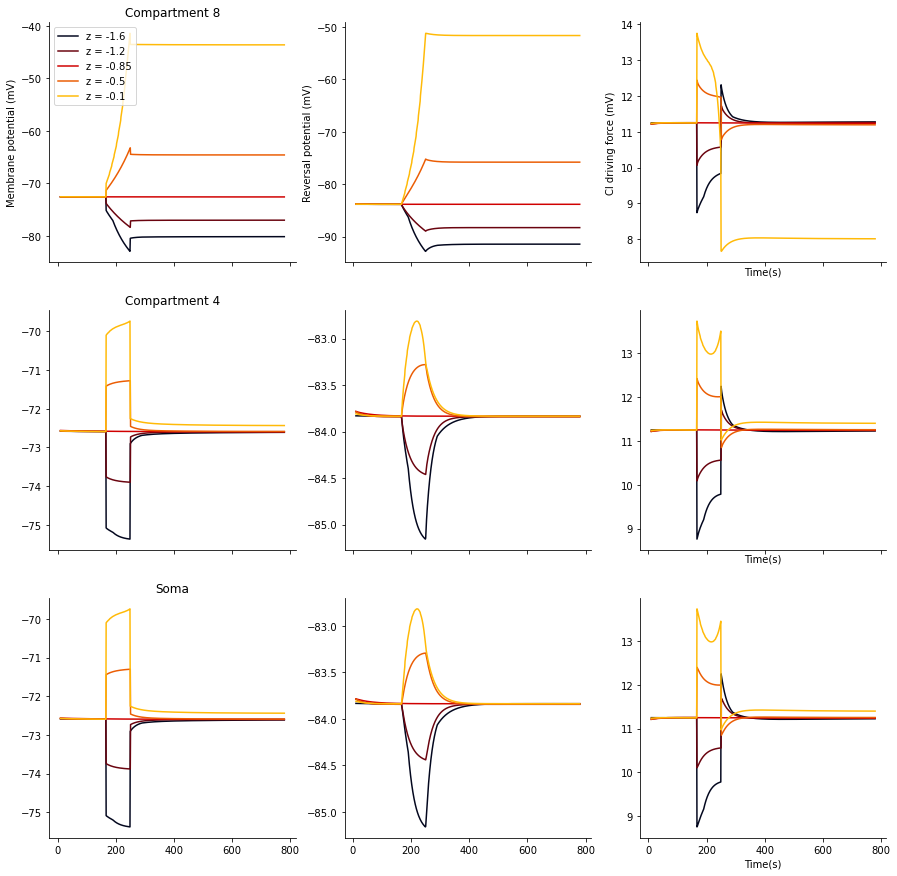

In [7]:
######
btn_plot_2b = widgets.Button(description="Plot 2B", button_style='success')
display(btn_plot_2b)
#####

z_arr = ["z = -1.6","z = -1.2", "z = -0.85", "z = -0.5","z = -0.1",]
colour_arr = ["#03071E","#6A040F", "#D00000", "#EB5D04","#FFBA08"] 



def btn_plot_2b_clicked(b):
    
    f2b, [(ax8_vm,ax8_ecl,ax8_df),(ax4_vm, ax4_ecl,ax4_df),(ax0_vm,ax0_ecl,ax0_df)] = mplt.subplots(3,3,figsize=(15,15), sharex=True) 
    x_arr = [ i for i in range(781)]
    
    for i in range(len(mega_arr)):
        
        y_8vm_arr, y_8ecl_arr,y_8df_arr = [],[],[]
        y_4vm_arr, y_4ecl_arr,y_4df_arr = [],[],[]
        y_0vm_arr, y_0ecl_arr,y_0df_arr = [],[],[]
        for j in range(781):
            try:
                y_8vm_arr.append(mega_arr[i][8][j][-3]*1e3)
                y_8ecl_arr.append(mega_arr[i][8][j][-1]*1e3)
                y_8df_arr.append(mega_arr[i][8][j][-3]*1e3-mega_arr[i][8][j][-1]*1e3)
                
                y_4vm_arr.append(mega_arr[i][4][j][-3]*1e3)
                y_4ecl_arr.append(mega_arr[i][4][j][-1]*1e3)
                y_4df_arr.append(mega_arr[i][4][j][-3]*1e3-mega_arr[i][4][j][-1]*1e3)
                
                y_0vm_arr.append(mega_arr[i][0][j][-3]*1e3)
                y_0ecl_arr.append(mega_arr[i][0][j][-1]*1e3)
                y_0df_arr.append(mega_arr[i][0][j][-3]*1e3-mega_arr[i][0][j][-1]*1e3)
            except:
                print(i)
                
        ax8_vm.set_title("Compartment 8")
        ax8_vm.plot(x_arr[10:],y_8vm_arr[10:], label = z_arr[i], color= colour_arr[i])
        ax8_vm.legend()
        ax8_vm.set_ylabel("Membrane potential (mV)")
        ax8_ecl.plot(x_arr[10:],y_8ecl_arr[10:], label = z_arr[i], color= colour_arr[i])
        ax8_ecl.set_ylabel("E-Cl (mV)")
        ax8_df.plot(x_arr[10:],y_8df_arr[10:], label = z_arr[i], color= colour_arr[i])
        ax8_df.set_ylabel("Cl driving force (mV)")
        ax8_df.set_xlabel("Time(s)")
        
        ax4_vm.set_title("Compartment 4")
        ax8_ecl.set_ylabel("Reversal potential (mV)")
        ax4_vm.plot(x_arr[10:],y_4vm_arr[10:], label = z_arr[i], color= colour_arr[i])
        ax4_ecl.plot(x_arr[10:],y_4ecl_arr[10:], label = z_arr[i], color= colour_arr[i])
        ax4_df.plot(x_arr[10:],y_4df_arr[10:], label = z_arr[i], color= colour_arr[i])
        ax4_df.set_xlabel("Time(s)")
        
        ax0_vm.set_title("Soma")
        ax0_vm.plot(x_arr[10:],y_0vm_arr[10:], label = z_arr[i], color= colour_arr[i])
        ax0_ecl.plot(x_arr[10:],y_0ecl_arr[10:], label = z_arr[i], color= colour_arr[i])
        ax0_df.plot(x_arr[10:],y_0df_arr[10:], label = z_arr[i], color= colour_arr[i])
        ax0_df.set_xlabel("Time(s)")
        
        
        sns.despine()
        
    

#####
btn_plot_2b.on_click(btn_plot_2b_clicked)

## FIG 2C


Button(button_style='success', description='Plot 2C', style=ButtonStyle())

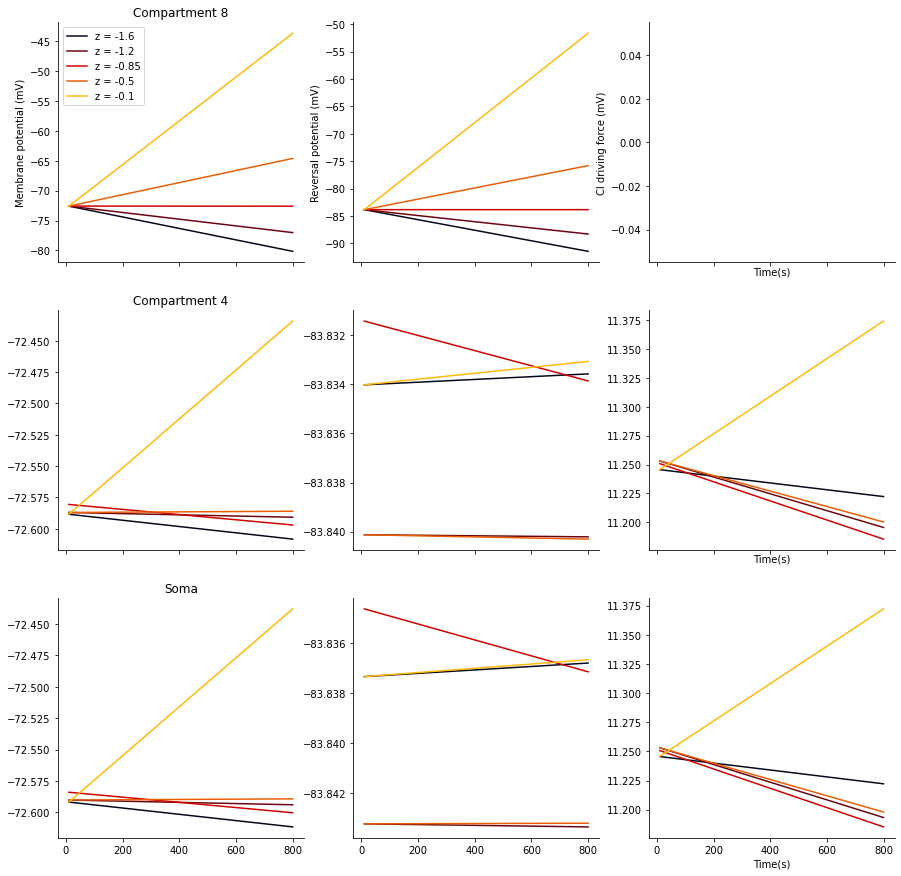

In [8]:
######
btn_plot_2c = widgets.Button(description="Plot 2C", button_style='success')
display(btn_plot_2c)
#####

z_arr = ["z = -1.6","z = -1.2", "z = -0.85", "z = -0.5","z = -0.1",]
colour_arr = ["#03071E","#6A040F", "#D00000", "#EB5D04","#FFBA08"] 



def btn_plot_2c_clicked(b):
    
    f2c, [(ax8_vm,ax8_ecl,ax8_df),(ax4_vm, ax4_ecl,ax4_df),(ax0_vm,ax0_ecl,ax0_df)] = mplt.subplots(3,3,figsize=(15,15), sharex=True) 
    x_arr = [10,800]
    
    for i in range(len(mega_arr)):
        
        y_8vm_arr, y_8ecl_arr,y_8df_arr = [],[],[]
        y_4vm_arr, y_4ecl_arr,y_4df_arr = [],[],[]
        y_0vm_arr, y_0ecl_arr,y_0df_arr = [],[],[]
        
        try:
            y_8vm_arr.append(mega_arr[i][8][165][-3]*1e3)
            y_8ecl_arr.append(mega_arr[i][8][165][-1]*1e3)
            y_8df_arr.append(mega_arr[i][8][165][-3]*1e3-mega_arr[i][8][165][-1]*1e3)
                
            y_4vm_arr.append(mega_arr[i][4][165][-3]*1e3)
            y_4ecl_arr.append(mega_arr[i][4][165][-1]*1e3)
            y_4df_arr.append(mega_arr[i][4][165][-3]*1e3-mega_arr[i][4][165][-1]*1e3)
                
            y_0vm_arr.append(mega_arr[i][0][165][-3]*1e3)
            y_0ecl_arr.append(mega_arr[i][0][165][-1]*1e3)
            y_0df_arr.append(mega_arr[i][0][165][-3]*1e3-mega_arr[i][0][165][-1]*1e3)
            
            
            y_8vm_arr.append(mega_arr[i][8][-1][-3]*1e3)
            y_8ecl_arr.append(mega_arr[i][8][-1][-1]*1e3)
            y_8df_arr.append(mega_arr[i][8][-1][-3]*1e3-mega_arr[i][8][10][-1]*1e3)
                
            y_4vm_arr.append(mega_arr[i][4][-1][-3]*1e3)
            y_4ecl_arr.append(mega_arr[i][4][-1][-1]*1e3)
            y_4df_arr.append(mega_arr[i][4][-1][-3]*1e3-mega_arr[i][4][10][-1]*1e3)
                
            y_0vm_arr.append(mega_arr[i][0][-1][-3]*1e3)
            y_0ecl_arr.append(mega_arr[i][0][-1][-1]*1e3)
            y_0df_arr.append(mega_arr[i][0][-1][-3]*1e3-mega_arr[i][0][10][-1]*1e3)
        except:
            print(i)
                
        ax8_vm.set_title("Compartment 8")
        ax8_vm.plot(x_arr,y_8vm_arr, label = z_arr[i], color= colour_arr[i])
        ax8_vm.legend()
        ax8_vm.set_ylabel("Membrane potential (mV)")
        ax8_ecl.plot(x_arr,y_8ecl_arr, label = z_arr[i], color= colour_arr[i])
        ax8_ecl.set_ylabel("E-Cl (mV)")
        ax8_df.plot(x_arr[10:],y_8df_arr[10:], label = z_arr[i], color= colour_arr[i])
        ax8_df.set_ylabel("Cl driving force (mV)")
        ax8_df.set_xlabel("Time(s)")
        
        ax4_vm.set_title("Compartment 4")
        ax8_ecl.set_ylabel("Reversal potential (mV)")
        ax4_vm.plot(x_arr,y_4vm_arr, label = z_arr[i], color= colour_arr[i])
        ax4_ecl.plot(x_arr,y_4ecl_arr, label = z_arr[i], color= colour_arr[i])
        ax4_df.plot(x_arr,y_4df_arr, label = z_arr[i], color= colour_arr[i])
        ax4_df.set_xlabel("Time(s)")
        
        ax0_vm.set_title("Soma")
        ax0_vm.plot(x_arr,y_0vm_arr, label = z_arr[i], color= colour_arr[i])
        ax0_ecl.plot(x_arr,y_0ecl_arr, label = z_arr[i], color= colour_arr[i])
        ax0_df.plot(x_arr,y_0df_arr, label = z_arr[i], color= colour_arr[i])
        ax0_df.set_xlabel("Time(s)")
        
        
        sns.despine()
        
    

#####
btn_plot_2c.on_click(btn_plot_2c_clicked)

# Fig 2D - chloride microdomains in each experiment

Text(159.0, 0.5, 'Valence')

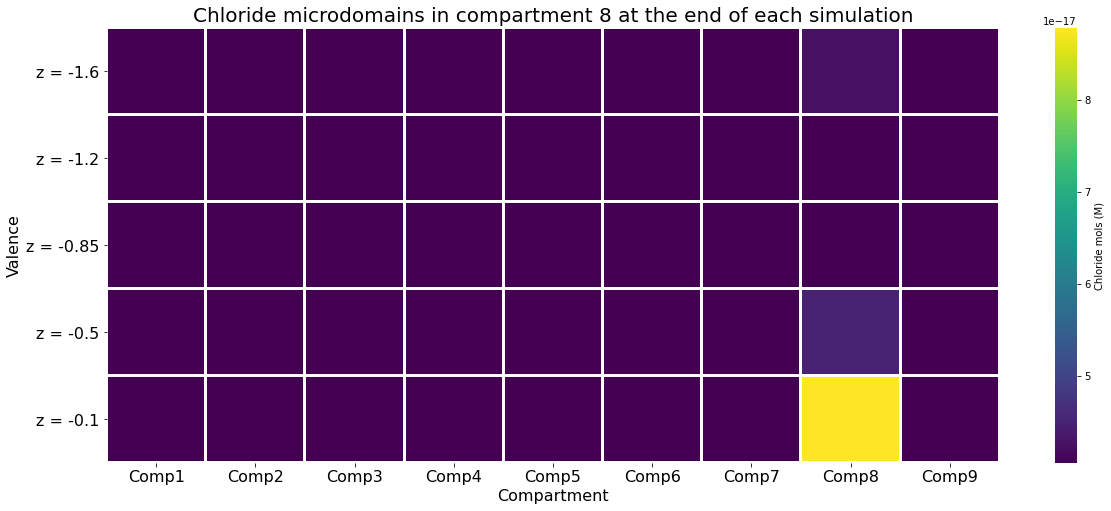

In [28]:

z_arr = ["z = -1.6","z = -1.2", "z = -0.85", "z = -0.5","z = -0.1",]
colour_arr = ["#03071E","#6A040F", "#D00000", "#EB5D04","#FFBA08"] 


cl_arr=[]

x_ax_labels = comp_names_arr[1:]

for i in range(len(z_arr)):
        
    temp_arr = []
    
    for c in range(len(comp_names_arr)-1):
            
        temp_arr.append(mega_arr[i][c+1][-1][6] * mega_arr[i][c+1][-1][3])  
        
    cl_arr.append(temp_arr)
     

f_cl, (ax_cl) = mplt.subplots(figsize=(20 , 8 ))

    
ax_cl = sns.heatmap(cl_arr,cmap="viridis", linewidth=2,cbar_kws={'label':'Chloride mols (M)'},cbar=True,ax=ax_cl)
ax_cl.set_yticklabels(z_arr, fontsize=16, rotation=0)
ax_cl.set_xticklabels(x_ax_labels, fontsize=16)
ax_cl.set_title("Chloride microdomains in compartment 8 at the end of each simulation", fontsize=20)
ax_cl.set_xlabel("Compartment", fontsize=16)
ax_cl.set_ylabel("Valence", fontsize=16)\


